# Breast Cancer Detection Using Logistic Regression

---

## Dataset Overview

The **Breast Cancer Detection Dataset** (e.g., Wisconsin Breast Cancer Dataset) contains features extracted from digitized images of breast tissue samples. It is used to classify tumors as:

- **Malignant (cancerous)**
- **Benign (non-cancerous)**

### Common Features:
- Radius
- Texture
- Perimeter
- Area
- Smoothness
- Compactness
- Concavity
- Symmetry
- Fractal dimension
- etc

Each feature describes physical characteristics of the cell nuclei in the tumor samples.

---

## Logistic Regression Model

Logistic regression is a widely-used binary classification algorithm that models the probability of a tumor being malignant. It applies the sigmoid function to a weighted sum of features:

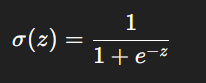

The output is a probability between 0 and 1. If the probability is above a chosen threshold (usually 0.5), the tumor is classified as malignant.

---

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [4]:
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [5]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.drop('id',axis=1,inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
encoded = l.fit_transform(df['diagnosis'])

In [13]:
df['diagnosis']=encoded

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
for i,c in enumerate(l.classes_):
    print(f"{c}->{i}")

B->0
M->1


In [16]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

## Standardize the features

We are gonna standardize the features that are not within 0 and 1

In [18]:
from sklearn.preprocessing import StandardScaler

# Select only float64 columns
float_cols = df.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the float columns
df[float_cols] = scaler.fit_transform(df[float_cols])


In [19]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


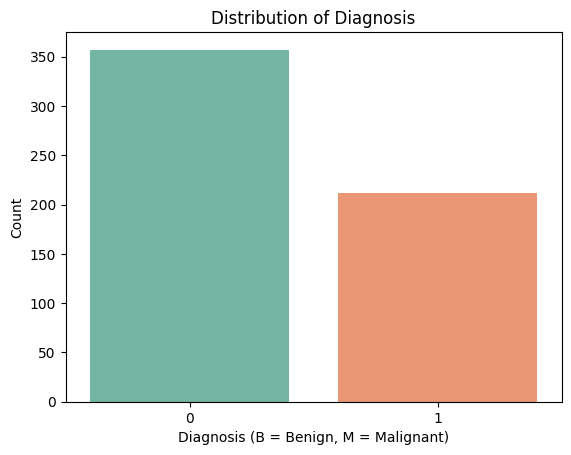

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='diagnosis', data=df, palette='Set2')

plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (B = Benign, M = Malignant)')
plt.ylabel('Count')
plt.show()


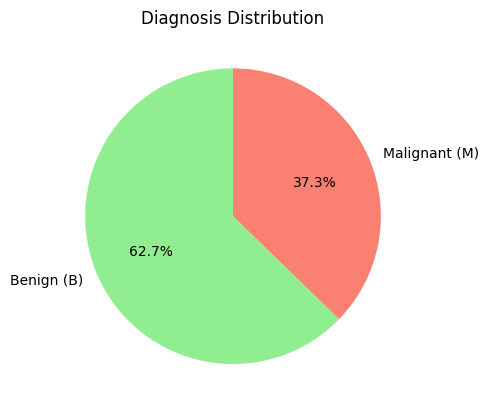

<Figure size 640x480 with 0 Axes>

In [21]:
# Pie chart
df['diagnosis'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'salmon'],
    labels=['Benign (B)', 'Malignant (M)']
)

plt.title('Diagnosis Distribution')
plt.ylabel('')
plt.show()
plt.savefig("distrib.png")


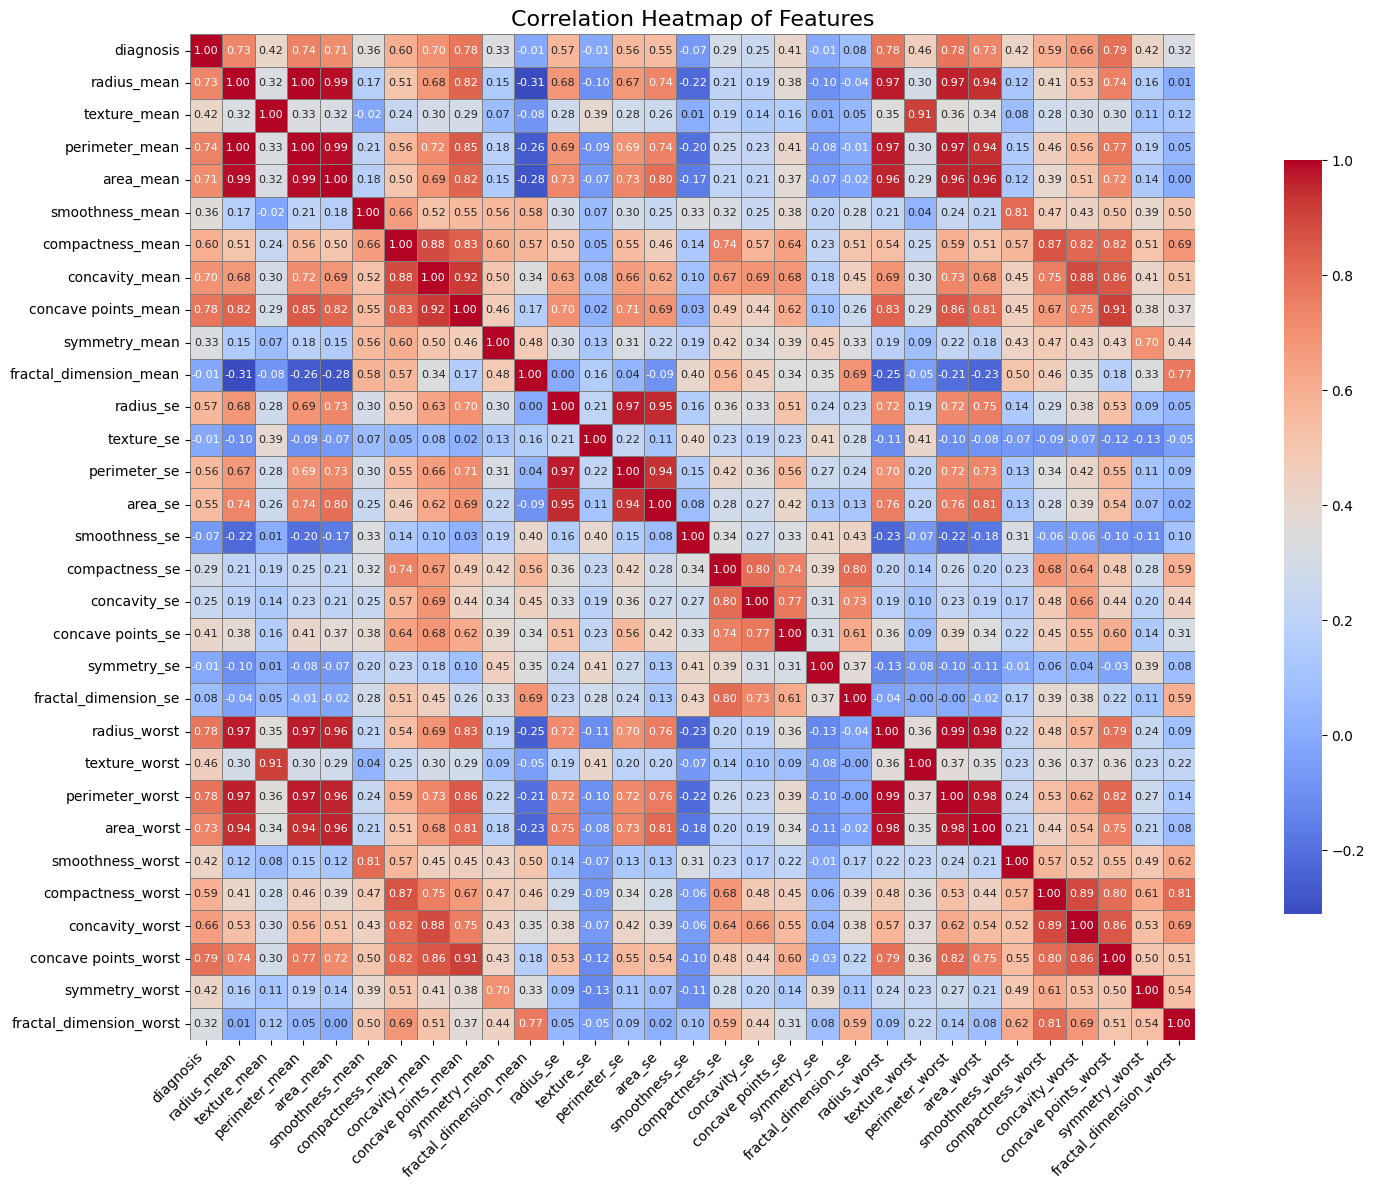

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))  # Set figure size

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",           # Color gradient from blue to red
    linewidths=0.5,            # Line between cells
    linecolor='gray',
    square=True,               # Make cells square
    cbar_kws={"shrink": 0.75}, # Shrink color bar
    annot_kws={"size": 8}      # Annotation font size
)

plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
plt.savefig("corrmap.jpg")


## Analysis of the correlation heatmap

We see from the heatmap that there are many features which are correlated and not any correlation that is near perfect positive correlation.. 

Now it will be very time consuming for us to do the feature selection by ourselves,if we want we can do it.For exampe radius is correlated with area as radius is used in the calculation area .. But we are gonna use L1 regularized logistic regression,What L1 regularization does is it shrinks coefficents of some features to zero hence doing feature selection.

## Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)


In [28]:
X,y = df.drop("diagnosis",axis=1),df['diagnosis']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
X_train.shape,y_train.shape

((455, 30), (455,))

In [ ]:
X_test.shape,y_test.shape

### Training the DT model

In [31]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
!pip install graphviz


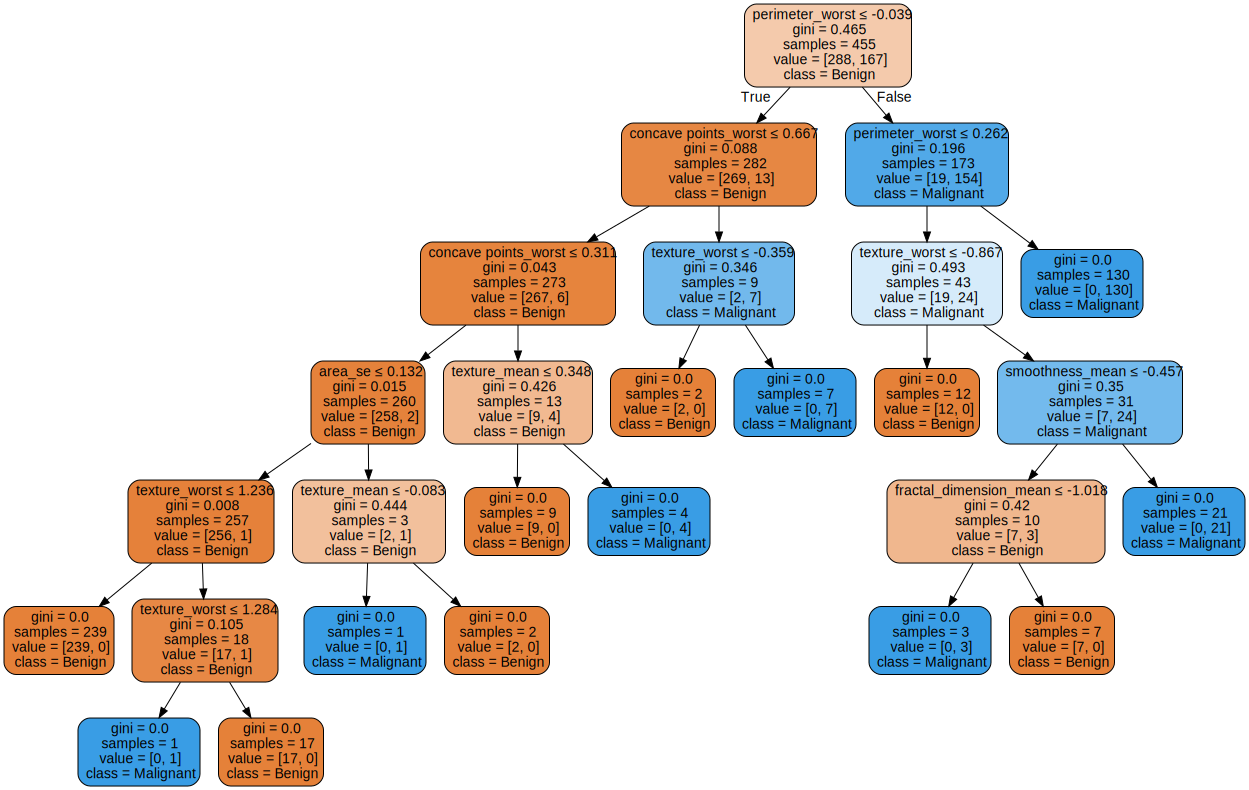

In [33]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    dt,
    out_file=None, 
    feature_names=X_train.columns,  # or pass feature list if it's a NumPy array
    class_names=['Benign', 'Malignant'], 
    filled=True, 
    rounded=True, 
    special_characters=True
)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # saves as decision_tree.pdf
graph



### Evaluation Metrics

#### Classification Report

In [34]:
from sklearn.metrics import classification_report
print("Train Report:\n",classification_report(y_train,dt.predict(X_train)))

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       167

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [35]:
from sklearn.metrics import classification_report
print("Test Report:\n",classification_report(y_test,dt.predict(X_test)))

Test Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92        69
           1       0.84      0.96      0.90        45

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



##### Checking Cross Val Score

In [36]:
from sklearn.model_selection import cross_val_score
dt1 = DecisionTreeClassifier(random_state=43)

scores = cross_val_score(dt1, X, y, cv=5, scoring='accuracy')  # 5-fold CV

print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation accuracy scores: [0.90350877 0.90350877 0.9122807  0.93859649 0.90265487]
Mean CV accuracy: 0.9121099208197485
Standard deviation: 0.013703467739643148


In [37]:
scores = cross_val_score(dt1, X, y, cv=5, scoring='precision')  # 5-fold CV

print("Cross-validation precision scores:", scores)
print("Mean CV precision:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation precision scores: [0.83333333 0.88095238 0.9        0.94871795 0.82978723]
Mean CV precision: 0.8785581794092432
Standard deviation: 0.04429846253602158


In [38]:
scores = cross_val_score(dt1, X, y, cv=5, scoring='recall')  # 5-fold CV

print("Cross-validation recall scores:", scores)
print("Mean CV recall:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation recall scores: [0.93023256 0.86046512 0.85714286 0.88095238 0.92857143]
Mean CV recall: 0.8914728682170543
Standard deviation: 0.0320291359113612


In [39]:
scores = cross_val_score(dt1, X, y, cv=5, scoring='f1')  # 5-fold CV

print("Cross-validation f1 scores:", scores)
print("Mean CV f1:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation f1 scores: [0.87912088 0.87058824 0.87804878 0.91358025 0.87640449]
Mean CV f1: 0.8835485272396809
Standard deviation: 0.015302038044364582


We have checked cross validated score for 5 folds and there is no sign of overfitting.Precision,recall,f1 and accuracy scores are consistent through out the folds.

##### Confusion Matrix

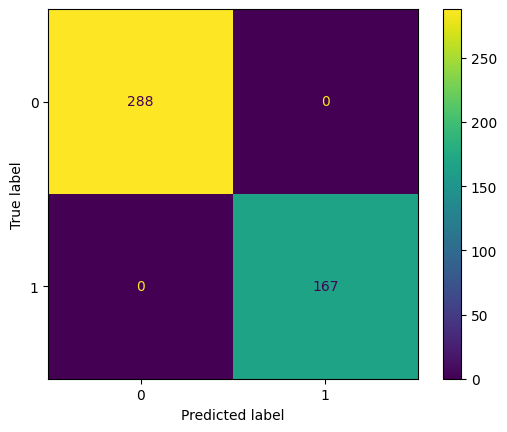

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, dt.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()  # This will plot the confusion matrix


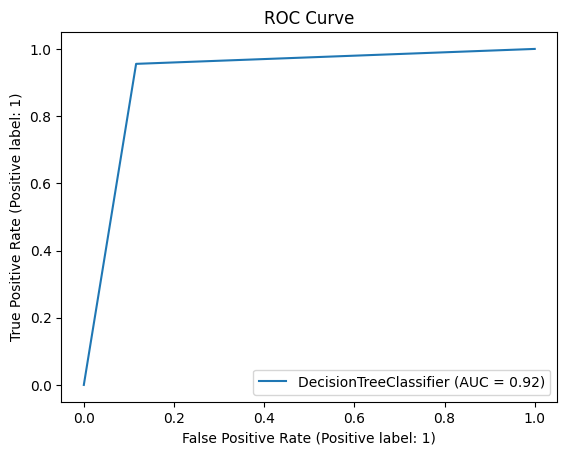

In [41]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Suppose you have a trained classifier 'clf', and test data X_test, y_test

RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [65]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_scores = dt.predict_proba(X_test)[:, 1]
auc_score_dt = roc_auc_score(y_test, y_scores)

print(f"AUC Score: {auc_score:.4f}")


AUC Score: 0.9198


### Choosing best depth for un pruned decision tree through validation curve

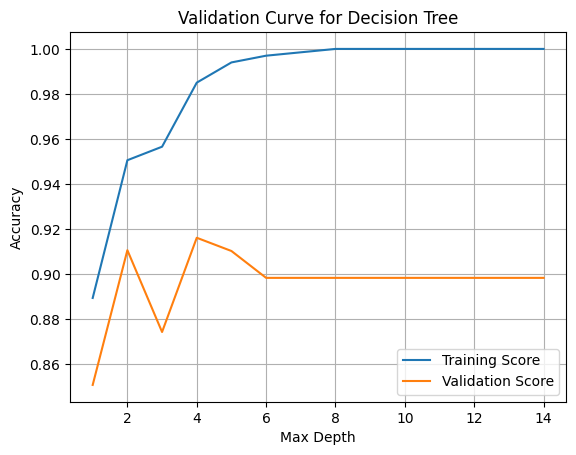

In [70]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

depths = np.arange(1, 15)
train_scores_dt, test_scores_dt = validation_curve(
    DecisionTreeClassifier(random_state=42),
    X_train, y_train,
    param_name="max_depth",
    param_range=depths,
    scoring="recall",
    cv=5
)

train_mean_dt = train_scores_dt.mean(axis=1)
test_mean_dt = test_scores_dt.mean(axis=1)

plt.plot(depths, train_mean_dt, label='Training Score')
plt.plot(depths, test_mean_dt, label='Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


So according to validation curve,for the unpruned decision tree **best depth will be 4**.If we chose depth after 4 i.e 5 ,6 ,7 etc then overfitting will occur and we dont want that.

In [50]:
train_scores.shape

(14, 5)

In [51]:
test_scores.shape

(14, 5)

### Choosing the best post pruned decision tree model

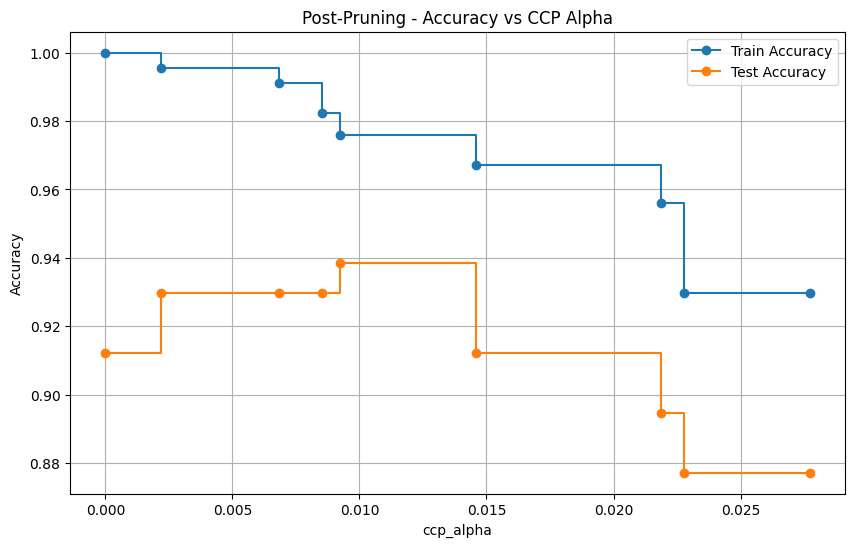

Best ccp_alpha: 0.0092, Test Accuracy: 0.9386


DecisionTreeClassifier(ccp_alpha=0.009230769230769232, random_state=42)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np



# Step 1: Train an initial tree to get effective alphas
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Step 2: Train trees for each alpha
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Step 3: Remove last tree (might be trivial)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Step 4: Evaluate train/test accuracy for each tree
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Step 5: Plot accuracy vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Post-Pruning - Accuracy vs CCP Alpha")
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Choose best model (based on best test accuracy)
best_index = np.argmax(test_scores)
best_alpha = ccp_alphas[best_index]
print(f"Best ccp_alpha: {best_alpha:.4f}, Test Accuracy: {test_scores[best_index]:.4f}")

# Final pruned model
final_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_model.fit(X_train, y_train)


### Choosing the best depth for post pruned model

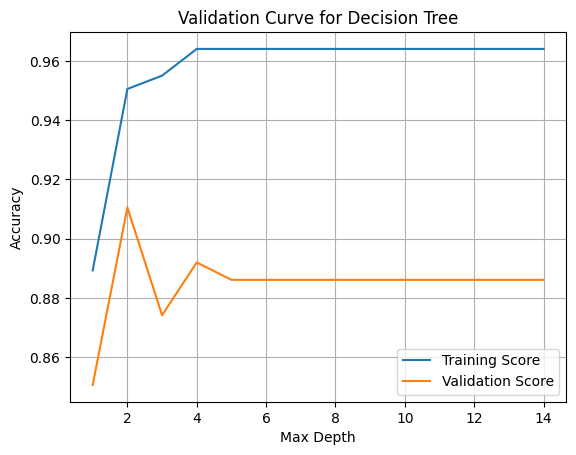

In [53]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

depths = np.arange(1, 15)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha),
    X_train, y_train,
    param_name="max_depth",
    param_range=depths,
    scoring="recall",
    cv=5
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(depths, train_mean, label='Training Score')
plt.plot(depths, test_mean, label='Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Validation Curve for Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


After the pruning **best max_depth is 2** and if we choose any depth after 2 then overfitting occurs..

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=44)

### Training the RandomForestClassifier model

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=44)

### Evaluation metrics


#### Classification Report

In [57]:
from sklearn.metrics import classification_report
print("Train Report:\n",classification_report(y_train,rf.predict(X_train)))

Train Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       288
           1       1.00      1.00      1.00       167

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [58]:
from sklearn.metrics import classification_report
print("Test Report:\n",classification_report(y_test,rf.predict(X_test)))

Test Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



##### Checking Cross val score

In [59]:
from sklearn.model_selection import cross_val_score
rf1 = RandomForestClassifier(random_state=45)

scores = cross_val_score(rf1, X, y, cv=5, scoring='accuracy')  # 5-fold CV

print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation accuracy scores: [0.92105263 0.92982456 0.98245614 0.95614035 0.97345133]
Mean CV accuracy: 0.9525850023288308
Standard deviation: 0.023885799084957422


In [60]:
from sklearn.model_selection import cross_val_score
rf1 = RandomForestClassifier(random_state=45)

scores = cross_val_score(rf1, X, y, cv=5, scoring='precision')  # 5-fold CV

print("Cross-validation precision scores:", scores)
print("Mean CV precision:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation precision scores: [0.88636364 0.97297297 0.97619048 0.95121951 0.95348837]
Mean CV precision: 0.9480469939630461
Standard deviation: 0.03242798203438474


In [61]:
from sklearn.model_selection import cross_val_score
rf1 = RandomForestClassifier(random_state=45)

scores = cross_val_score(rf1, X, y, cv=5, scoring='recall')  # 5-fold CV

print("Cross-validation recall scores:", scores)
print("Mean CV recall:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation recall scores: [0.90697674 0.8372093  0.97619048 0.92857143 0.97619048]
Mean CV recall: 0.9250276854928018
Standard deviation: 0.05154750299116349


In [62]:
from sklearn.model_selection import cross_val_score
rf1 = RandomForestClassifier(random_state=45)

scores = cross_val_score(rf1, X, y, cv=5, scoring='f1')  # 5-fold CV

print("Cross-validation f1 scores:", scores)
print("Mean CV f1:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation f1 scores: [0.89655172 0.9        0.97619048 0.93975904 0.96470588]
Mean CV f1: 0.9354414237651854
Standard deviation: 0.03257004403513685


#### Confusion Matrix

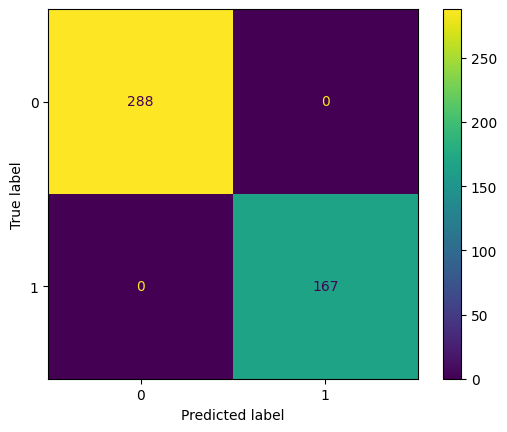

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_train, rf.predict(X_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()  # This will plot the confusion matrix


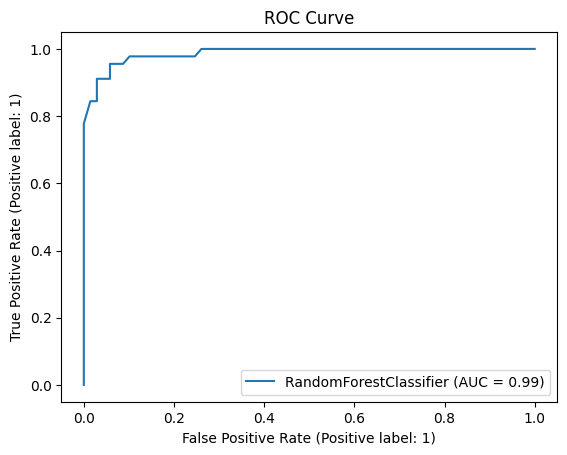

In [64]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Suppose you have a trained classifier 'clf', and test data X_test, y_test

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.title("ROC Curve")
plt.show()


In [68]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for the positive class
y_scores = rf.predict_proba(X_test)[:, 1]
auc_score_rf = roc_auc_score(y_test, y_scores)

print(f"AUC Score: {auc_score:.4f}")

AUC Score: 0.9198


### Choosing the best estimators value for RandomForestClassifier

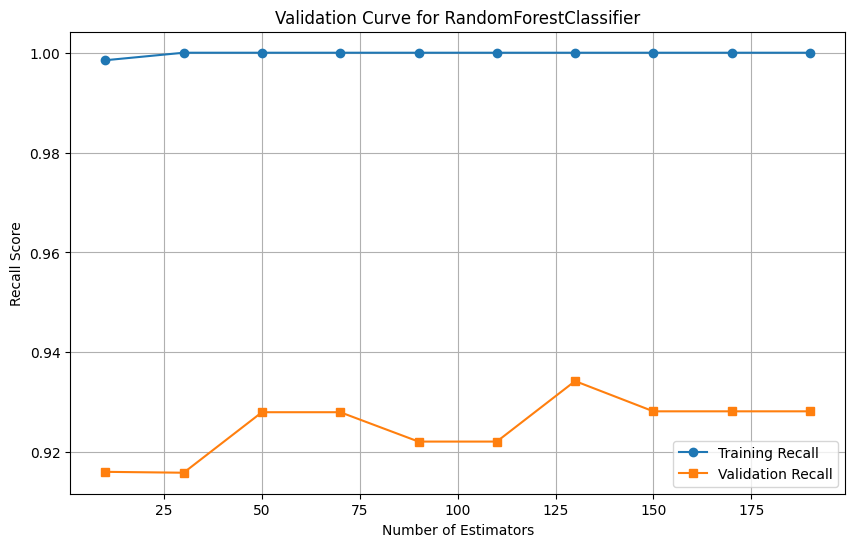

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np

# Define range of n_estimators to evaluate
estimators = np.arange(10, 210, 20)

# Calculate training and validation scores
train_scores_rf, test_scores_rf = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name="n_estimators",
    param_range=estimators,
    scoring="recall",  # Change to "accuracy" or "f1" as needed
    cv=5,
    n_jobs=-1
)

# Compute mean scores
train_mean_rf = train_scores_rf.mean(axis=1)
test_mean_rf = test_scores_rf.mean(axis=1)

# Plot the validation curve
plt.figure(figsize=(10,6))
plt.plot(estimators, train_mean_rf, label='Training Recall', marker='o')
plt.plot(estimators, test_mean_rf, label='Validation Recall', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Recall Score')
plt.title('Validation Curve for RandomForestClassifier')
plt.legend()
plt.grid(True)
plt.show()


In [73]:
# Print best number of estimators
best_index = np.argmax(test_mean_rf)
best_estimators = estimators[best_index]
print(f"Best number of estimators (n_estimators): {best_estimators}")
print(f"Best validation recall: {test_mean[best_index]:.4f}")

Best number of estimators (n_estimators): 130
Best validation recall: 0.9342


Best number of estimators is *130*

### Doing Randomized Search CV for RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the parameter distribution (excluding n_estimators)
param_dist = {
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the model with n_estimators fixed
rf_cv = RandomForestClassifier(n_estimators=130, random_state=42)

# Randomized Search CV setup
random_search = RandomizedSearchCV(
    estimator=rf_cv,
    param_distributions=param_dist,
    n_iter=50,                # Number of combinations to try
    scoring='recall',         # Or 'accuracy', 'f1' depending on your goal
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the search on your data
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters Found:", random_search.best_params_)
print(f"Best Validation Recall: {random_search.best_score_:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters Found: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5}
Best Validation Recall: 0.9342


## Comparing RF and Decision Tree model

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize with best hyperparameters
rf_model = RandomForestClassifier(n_estimators=130, random_state=42, **random_search.best_params_)

# Decision Tree with best alpha and depth
dt_model = DecisionTreeClassifier(max_depth=2, ccp_alpha=best_alpha, random_state=42)


In [77]:
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
dt_pred = dt_model.predict(X_test)


In [78]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("🔍 Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

print("\n🌳 Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Recall:", recall_score(y_test, dt_pred))
print("AUC:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]))


🔍 Random Forest Performance:
Accuracy: 0.9385964912280702
Recall: 0.9333333333333333
AUC: 0.9861513687600645

🌳 Decision Tree Performance:
Accuracy: 0.8947368421052632
Recall: 0.9555555555555556
AUC: 0.9463768115942031


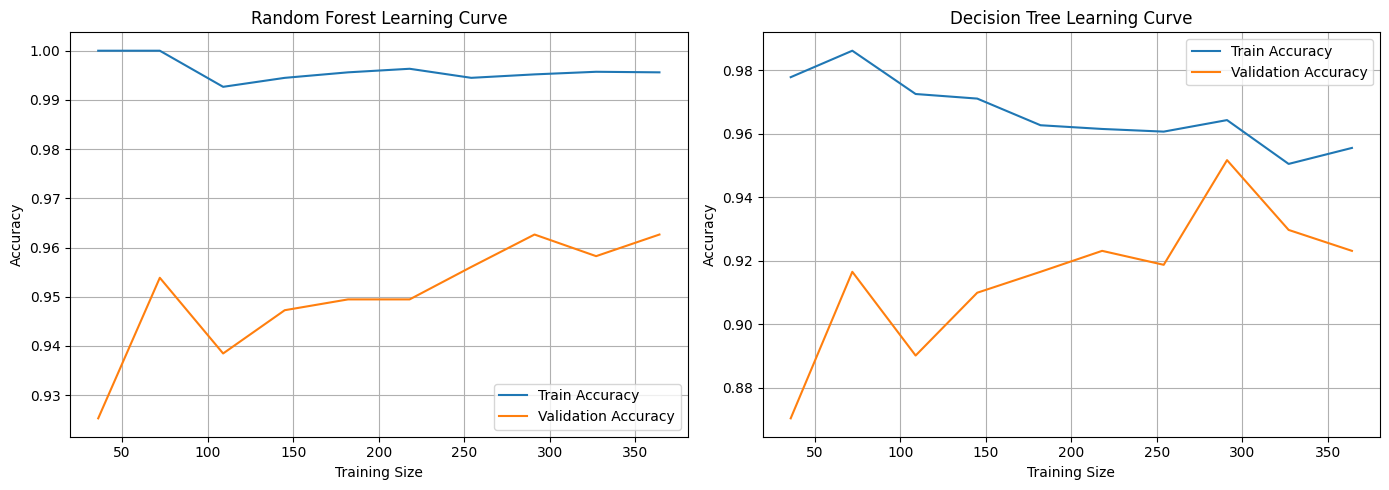

In [81]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, title):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    plt.plot(train_sizes, train_mean, label='Train Accuracy')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plot_learning_curve(rf_model, "Random Forest Learning Curve")

plt.subplot(1, 2, 2)
plot_learning_curve(dt_model, "Decision Tree Learning Curve")

plt.tight_layout()
plt.savefig("learning_curves.png", dpi=300)
plt.show()



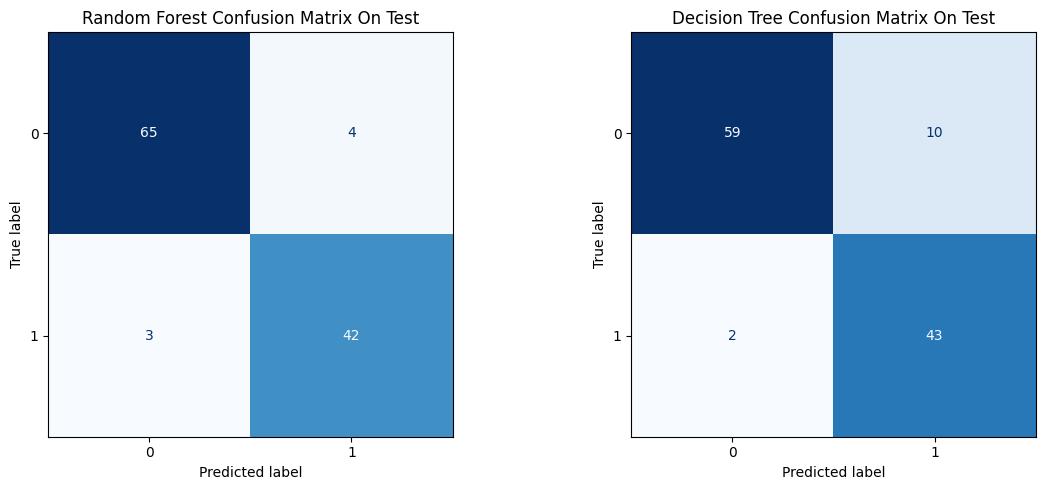

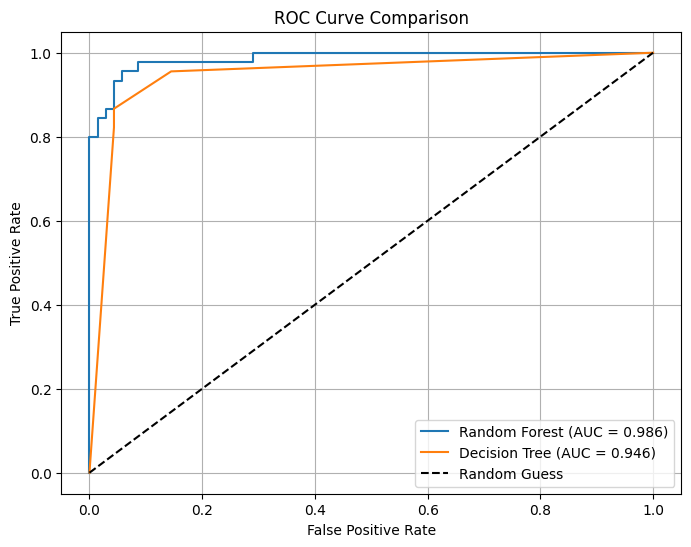

In [85]:
# Confusion Matrices
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("Random Forest Confusion Matrix On Test")
ConfusionMatrixDisplay(confusion_matrix(y_test, dt_pred)).plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title("Decision Tree Confusion Matrix On Test")
plt.tight_layout()
plt.savefig("confusionmatrix.png", dpi=300)

plt.show()

# ROC curves
rf_probs = rf_model.predict_proba(X_test)[:, 1]
dt_probs = dt_model.predict_proba(X_test)[:, 1]

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

rf_auc = auc(rf_fpr, rf_tpr)
dt_auc = auc(dt_fpr, dt_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.savefig("roc.png", dpi=300)
plt.show()

## Evaluation using cross val score

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score
import numpy as np

# Define metrics you want to evaluate
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

def evaluate_model_cv(model, X, y):
    results = {}
    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y, cv=5, scoring=metric, n_jobs=-1)
        results[metric] = (np.mean(scores), np.std(scores))
    return results

# Evaluate Random Forest
rf_results = evaluate_model_cv(rf_model, X_train, y_train)

# Evaluate Decision Tree
dt_results = evaluate_model_cv(dt_model, X_train, y_train)

# Print results
print("Random Forest Cross-Validation Results:")
for metric, (mean_score, std_score) in rf_results.items():
    print(f"{metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")

print("\nDecision Tree Cross-Validation Results:")
for metric, (mean_score, std_score) in dt_results.items():
    print(f"{metric.capitalize()}: {mean_score:.4f} (+/- {std_score:.4f})")


Random Forest Cross-Validation Results:
Accuracy: 0.9626 (+/- 0.0256)
Precision: 0.9629 (+/- 0.0120)
Recall: 0.9342 (+/- 0.0673)
F1: 0.9472 (+/- 0.0381)

Decision Tree Cross-Validation Results:
Accuracy: 0.9231 (+/- 0.0303)
Precision: 0.8873 (+/- 0.0581)
Recall: 0.9105 (+/- 0.0499)
F1: 0.8972 (+/- 0.0401)


## Feature Importance By RandomForestClassifier

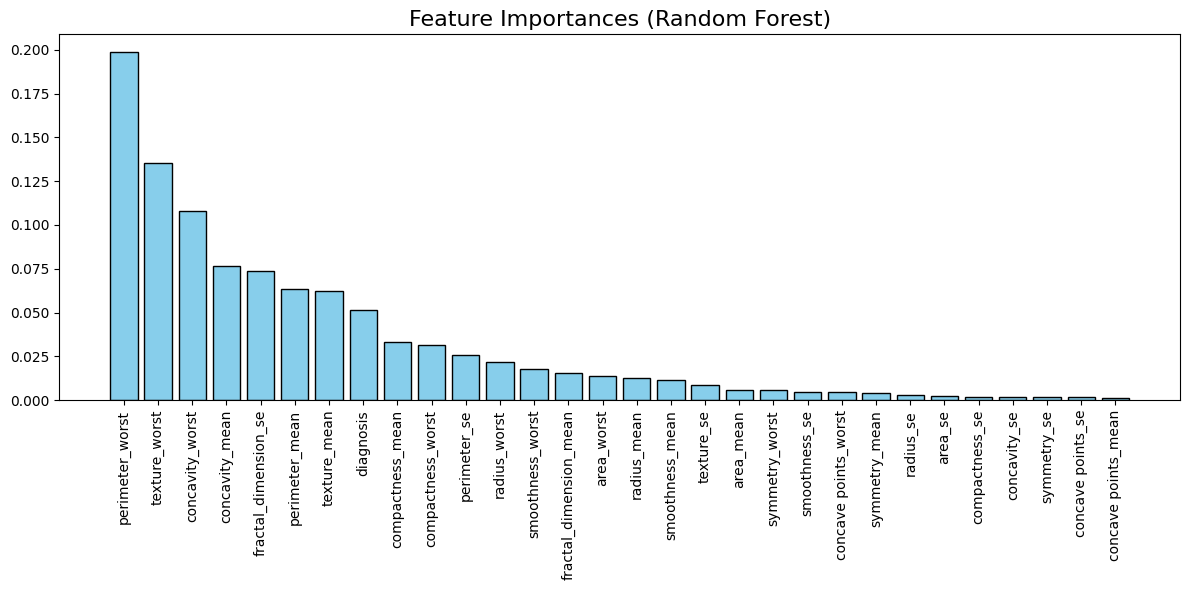

In [89]:
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = df.columns
# Plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest)", fontsize=16)
plt.bar(range(X.shape[1]), importances[indices], align="center", color="skyblue", edgecolor="k")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.savefig("featureimportance.jpg")
plt.show()

## Model Performance Comparison and Conclusion

## Cross-Validation Performance Summary

### 🔍 Random Forest Cross-Validation Results
- **Accuracy:** 0.9626 ± 0.0256
- **Precision:** 0.9629 ± 0.0120
- **Recall:** 0.9342 ± 0.0673
- **F1 Score:** 0.9472 ± 0.0381

### 🌳 Decision Tree(Post Pruned) Cross-Validation Results
- **Accuracy:** 0.9231 ± 0.0303
- **Precision:** 0.8873 ± 0.0581
- **Recall:** 0.9105 ± 0.0499
- **F1 Score:** 0.8972 ± 0.0401

---

### Conclusion

- The **Random Forest** model consistently outperforms the Decision Tree across all key metrics (accuracy, precision, recall, and F1 score), demonstrating better overall robustness and predictive power.
- Random Forest achieves higher **accuracy** and **precision**, indicating it makes fewer overall errors and false positives.
- The **recall** for Random Forest, while slightly higher, has more variance compared to the Decision Tree, suggesting some variability in detecting positive cases across folds.
- The **F1 score**—balancing precision and recall—is significantly higher for Random Forest, reinforcing its superior balance between identifying positives correctly and avoiding false alarms.
- The **Decision Tree**, while simpler and faster, shows lower performance and more variability in precision and recall, which might make it less reliable for critical tasks.
  
---

### Recommendation

Given the consistent superiority of the **Random Forest** model in cross-validation, it is the preferred choice for deployment or further tuning. The Decision Tree could still be useful where interpretability or computational efficiency is paramount, but with a trade-off in predictive performance.

